### About Dataset
#### Context

Welcome. This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”.

### Content
This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:



- Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
- Age: Positive Integer variable of the reviewers age.
- Title: String variable for the title of the review.
- Review Text: String variable for the review body.
- Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
- Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
- Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
- Division Name: Categorical name of the product high level division.
- Department Name: Categorical name of the product department name.
- Class Name: Categorical name of the product class name.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
df.drop('Unnamed: 0', inplace=True, axis=1)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [6]:
df.dtypes

Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [7]:
# dict(df.count())

In [8]:
def unique_func(x):
    info= pd.DataFrame(x.columns)
    info=info.rename(columns={0:'column_name'})
    # for i in x.columns:
    info['no_unique']= info['column_name'].map(x.nunique().to_dict())
    info['duplicate']= info['column_name'].map((x.count() - x.nunique()).to_dict())
    info['null values']=info['column_name'].map(x.isnull().sum().to_dict())
    info['dtypes']=info['column_name'].map((x.dtypes.to_dict()))
    return info

In [9]:
unique_func(df)

,column_name,no_unique,duplicate,null values,dtypes
0,Clothing ID,1206,22280,0,int64
1,Age,77,23409,0,int64
2,Title,13993,5683,3810,object
3,Review Text,22634,7,845,object
4,Rating,5,23481,0,int64
5,Recommended IND,2,23484,0,int64
6,Positive Feedback Count,82,23404,0,int64
7,Division Name,3,23469,14,object
8,Department Name,6,23466,14,object
9,Class Name,20,23452,14,object


## CLEANING DATA

### Data Type
For Data Analysis all the column have the right data type. After the Data Analysis we can change the data type of Categorical features into int as part of feature engineering.

In [10]:
df[df['Review Text'].duplicated()]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
93,1081,31,NaN,NaN,5,1,0,General,Dresses,Dresses
98,1133,50,NaN,NaN,5,1,0,General,Jackets,Outerwear
135,861,35,NaN,NaN,4,1,0,General Petite,Tops,Knits
142,1126,35,NaN,NaN,5,1,0,General,Jackets,Outerwear
165,829,35,NaN,NaN,3,0,0,General Petite,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23258,862,35,NaN,NaN,4,1,0,General,Tops,Knits
23301,862,52,NaN,NaN,5,1,0,General,Tops,Knits
23303,823,46,NaN,NaN,5,1,0,General,Tops,Blouses
23470,1104,39,NaN,NaN,5,1,0,General Petite,Dresses,Dresses


### Missing Values

In [11]:
unique_func(df)

,column_name,no_unique,duplicate,null values,dtypes
0,Clothing ID,1206,22280,0,int64
1,Age,77,23409,0,int64
2,Title,13993,5683,3810,object
3,Review Text,22634,7,845,object
4,Rating,5,23481,0,int64
5,Recommended IND,2,23484,0,int64
6,Positive Feedback Count,82,23404,0,int64
7,Division Name,3,23469,14,object
8,Department Name,6,23466,14,object
9,Class Name,20,23452,14,object


##### Let's create a new Feature to keep record of Null Values from Review Text and Title Feature. 
- 0 represent Null Values
- 1 represnent Not Null Values

In [12]:
def impute_nan(x):
    df[x+'nan_var']=np.where(df[x].isnull(),0,1)

In [13]:
for i in ['Title','Review Text']:
    impute_nan(i)

In [14]:
df[df['Review Text'].isnull() & df['Title'].isnull()]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Titlenan_var,Review Textnan_var
92,861,23,NaN,NaN,5,1,0,General Petite,Tops,Knits,0,0
93,1081,31,NaN,NaN,5,1,0,General,Dresses,Dresses,0,0
98,1133,50,NaN,NaN,5,1,0,General,Jackets,Outerwear,0,0
135,861,35,NaN,NaN,4,1,0,General Petite,Tops,Knits,0,0
142,1126,35,NaN,NaN,5,1,0,General,Jackets,Outerwear,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
23258,862,35,NaN,NaN,4,1,0,General,Tops,Knits,0,0
23301,862,52,NaN,NaN,5,1,0,General,Tops,Knits,0,0
23303,823,46,NaN,NaN,5,1,0,General,Tops,Blouses,0,0
23470,1104,39,NaN,NaN,5,1,0,General Petite,Dresses,Dresses,0,0


So there are reviews where there is no review text given for the Clothing Product. Hence the title is also missing for those review rows. Hence changing those values with 'Not Given' text on both Title and Review Text Column.

In [15]:
df['Title']=np.where(df['Review Text'].isnull() & df['Title'].isnull(), 'Not Given',df['Title'])
df['Review Text']= np.where(df['Review Text'].isnull(), 'Not Given', df['Review Text'])
unique_func(df)

,column_name,no_unique,duplicate,null values,dtypes
0,Clothing ID,1206,22280,0,int64
1,Age,77,23409,0,int64
2,Title,13994,6526,2966,object
3,Review Text,22635,851,0,object
4,Rating,5,23481,0,int64
5,Recommended IND,2,23484,0,int64
6,Positive Feedback Count,82,23404,0,int64
7,Division Name,3,23469,14,object
8,Department Name,6,23466,14,object
9,Class Name,20,23452,14,object


Let's replace the Null values of Title feature with the mode of the Title feature.

In [16]:
mode = (df[df['Title']!='Not Given']['Title'].mode())[0]
mode

'Love it!'

In [17]:
df['Title'].fillna(mode, inplace=True)
unique_func(df)

,column_name,no_unique,duplicate,null values,dtypes
0,Clothing ID,1206,22280,0,int64
1,Age,77,23409,0,int64
2,Title,13994,9492,0,object
3,Review Text,22635,851,0,object
4,Rating,5,23481,0,int64
5,Recommended IND,2,23484,0,int64
6,Positive Feedback Count,82,23404,0,int64
7,Division Name,3,23469,14,object
8,Department Name,6,23466,14,object
9,Class Name,20,23452,14,object


In [18]:
df[df['Division Name'].isnull()]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Titlenan_var,Review Textnan_var
9444,72,25,My favorite socks!!!,"I never write reviews, but these socks are so ...",5,1,0,NaN,NaN,NaN,1,1
13767,492,23,So soft!,I just love this hoodie! it is so soft and com...,5,1,1,NaN,NaN,NaN,1,1
13768,492,49,Wardrobe staple,Love this hoodie. so soft and goes with everyt...,5,1,0,NaN,NaN,NaN,1,1
13787,492,48,Not Given,Not Given,5,1,0,NaN,NaN,NaN,0,0
16216,152,36,Warm and cozy,"Just what i was looking for. soft, cozy and warm.",5,1,0,NaN,NaN,NaN,1,1
16221,152,37,Love!,I am loving these. they are quite long but are...,5,1,0,NaN,NaN,NaN,1,1
16223,152,39,"""long and warm""",These leg warmers are perfect for me. they are...,5,1,0,NaN,NaN,NaN,1,1
18626,184,34,Nubby footless tights,"These are amazing quality. i agree, size up to...",5,1,5,NaN,NaN,NaN,1,1
18671,184,54,New workhorse,These tights are amazing! if i care for them w...,5,1,0,NaN,NaN,NaN,1,1
20088,772,50,Comfy sweatshirt!,This sweatshirt is really nice! it's oversize...,5,1,0,NaN,NaN,NaN,1,1


So, the 14 Missing Values in Division Name, Department Name and Class Name are for same 14 review rows. We can delete these 14 records as they are not going to affect our dataset.

In [19]:
df=df[df['Division Name'].notna()]
df[df['Division Name'].isnull()]


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Titlenan_var,Review Textnan_var


In [20]:
unique_func(df)

,column_name,no_unique,duplicate,null values,dtypes
0,Clothing ID,1199,22273,0,int64
1,Age,77,23395,0,int64
2,Title,13985,9487,0,object
3,Review Text,22622,850,0,object
4,Rating,5,23467,0,int64
5,Recommended IND,2,23470,0,int64
6,Positive Feedback Count,82,23390,0,int64
7,Division Name,3,23469,0,object
8,Department Name,6,23466,0,object
9,Class Name,20,23452,0,object


### Duplicate Values

In [21]:
# df= df[~(df[df['Review Text']!='Not Given']['Review Text'].duplicated())]
# # df=df[df['Review Text']!='Not Given'].drop_duplicates()
# df.drop(df[df['Review Text']!='Not Given']['Review Text'].duplicated())
# unique_func(df)

### Exploratory Data Analysis

In [22]:
unique_func(df)

,column_name,no_unique,duplicate,null values,dtypes
0,Clothing ID,1199,22273,0,int64
1,Age,77,23395,0,int64
2,Title,13985,9487,0,object
3,Review Text,22622,850,0,object
4,Rating,5,23467,0,int64
5,Recommended IND,2,23470,0,int64
6,Positive Feedback Count,82,23390,0,int64
7,Division Name,3,23469,0,object
8,Department Name,6,23466,0,object
9,Class Name,20,23452,0,object


#### Top Clothing IDs which have been reviewed by customers??

In [23]:
df['Clothing ID'].value_counts(ascending=False)

Clothing ID
1078    1024
862      806
1094     756
1081     582
872      545
        ... 
303        1
776        1
668        1
633        1
522        1
Name: count, Length: 1199, dtype: int64

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Clothing ID', ylabel='count'>

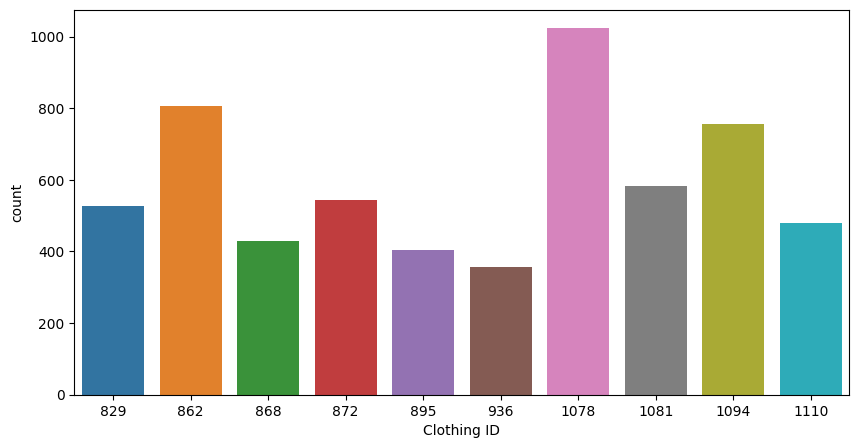

In [24]:
plt.figure(figsize=(10,5))
df1= pd.DataFrame(df['Clothing ID'].value_counts()[:10]).reset_index()
# df1
sns.barplot(x='Clothing ID', y='count', data=df1)

### What are the top Age Group Customers giving the reviews??

In [25]:
# df.sort_values(ascending=False, by='Clothing ID')

In [26]:
unique_func(df)

,column_name,no_unique,duplicate,null values,dtypes
0,Clothing ID,1199,22273,0,int64
1,Age,77,23395,0,int64
2,Title,13985,9487,0,object
3,Review Text,22622,850,0,object
4,Rating,5,23467,0,int64
5,Recommended IND,2,23470,0,int64
6,Positive Feedback Count,82,23390,0,int64
7,Division Name,3,23469,0,object
8,Department Name,6,23466,0,object
9,Class Name,20,23452,0,object


In [27]:
def ag_func(x):
    if x<=10:
        return '0-10'
    elif x<=20:
        return '11-20'
    elif x<=30:
        return '21-30'
    elif x<=40:
        return '31-40'
    elif x<=50:
        return '41-50'
    elif x<=60:
        return '51-60'
    elif x<=70:
        return '61-70'
    elif x<=80:
        return '71-80'
    elif x<=90:
        return '81-90'
    else:
        return '90+'

In [28]:
df['Age Group']= df['Age'].apply(lambda x: ag_func(x))
# df.head()

In [29]:
# df['Age Group'].value_counts(ascending=True)

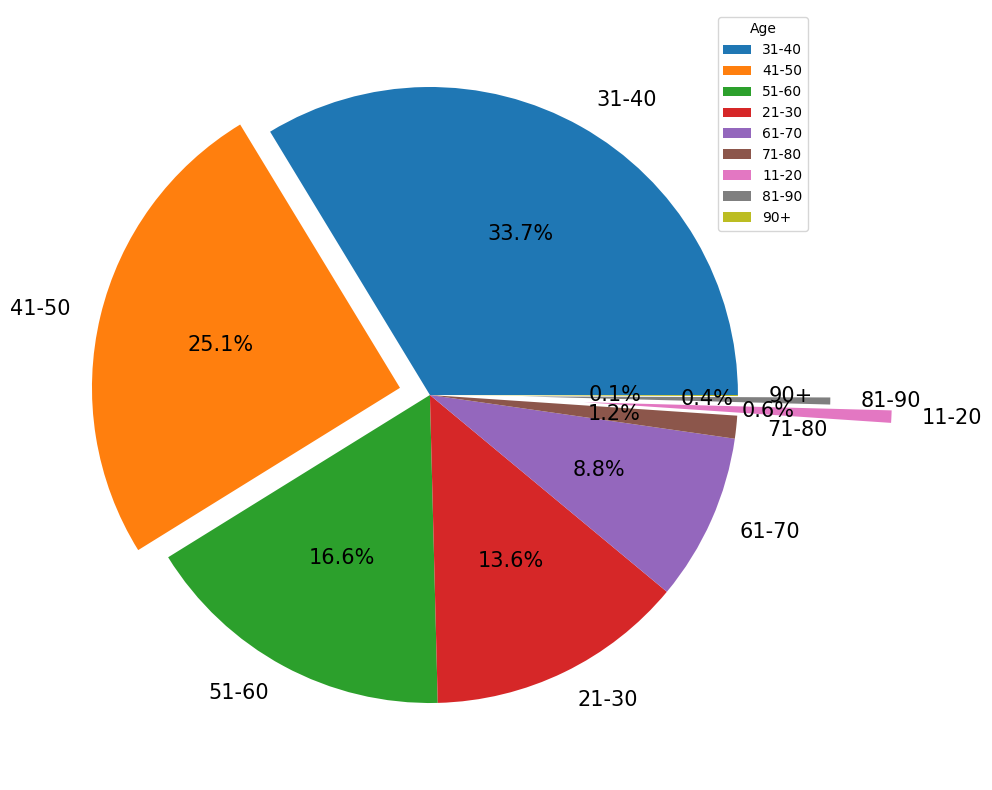

In [30]:
plt.figure(figsize=(10,10))
df1=df['Age Group'].value_counts()
explode=(0,0.1,0,0,0,0,0.5,0.3,0.0)
labels=list(df['Age Group'].value_counts().index)
plt.pie(df1, labels=labels, autopct='%.1f%%',textprops={'fontsize': 15},shadow=False,explode=explode)
plt.legend(title='Age', loc='upper right')

- The Most Reviews have been given from the 30's and 40's Age group customers.
- The least Reviews are from the 90+ ,80's and 10's Age Group Customers.

In [31]:
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name', 'Titlenan_var', 'Review Textnan_var',
       'Age Group'],
      dtype='object')

### How's the Distribution of Divison Name ,Department Name and Class Name for the reviews?

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


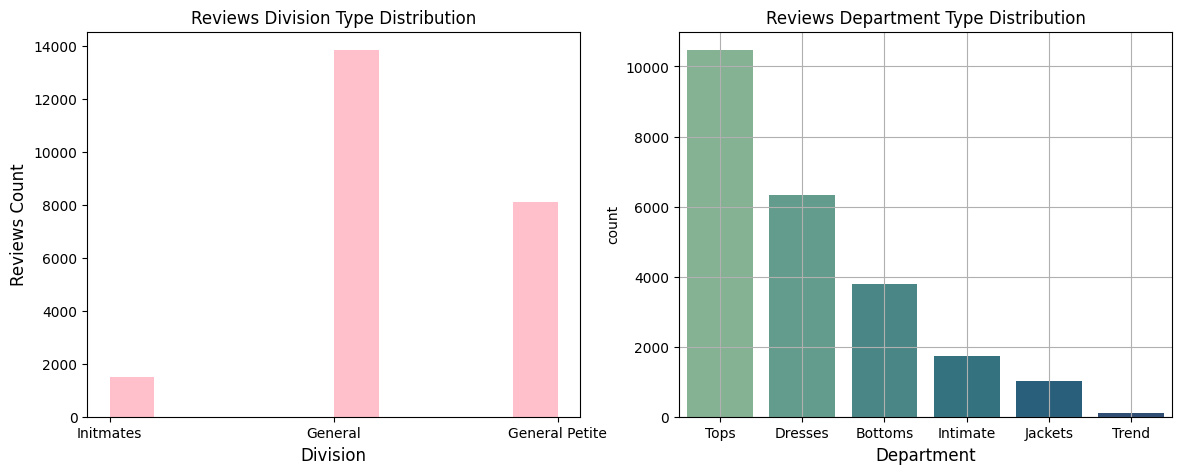

In [32]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.hist(x=df['Division Name'],color='pink')
plt.title('Reviews Division Type Distribution')
plt.xlabel('Division',size=12)
plt.ylabel('Reviews Count',size=12)
plt.subplot(1,2,2)
df1=df['Department Name'].value_counts().reset_index()
sns.barplot(x='Department Name', y='count', data=df1,palette='crest')
# sns.color_palette("crest", as_cmap=True)
plt.title('Reviews Department Type Distribution')
plt.xlabel('Department',size=12)
plt.grid()

#### Division Name:
- Max Reviews- General Division
- Min Reviews- Intimates

#### Department Name:
- Max Reviews- Tops Department
- Min Reviews- Trend Department

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


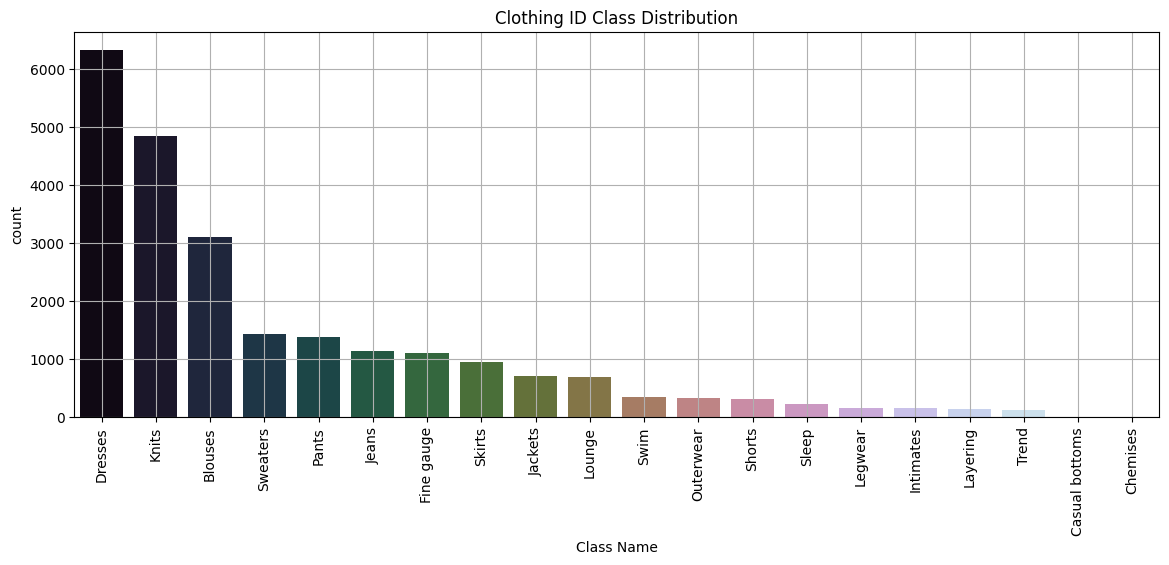

In [33]:
plt.figure(figsize=(14,5))
df1=df['Class Name'].value_counts().reset_index()
sns.barplot(x='Class Name', y='count', data=df1, palette='cubehelix')
plt.xticks(rotation=90)
plt.title('Clothing ID Class Distribution')
plt.grid()

#### Class Name:
- Max Reviews- Dresses Class
- Min Reviews- Casual Bottoms and Chemises Class

### How is the Distribution of Recommended IND for the reviews??

In [34]:
unique_func(df)

,column_name,no_unique,duplicate,null values,dtypes
0,Clothing ID,1199,22273,0,int64
1,Age,77,23395,0,int64
2,Title,13985,9487,0,object
3,Review Text,22622,850,0,object
4,Rating,5,23467,0,int64
5,Recommended IND,2,23470,0,int64
6,Positive Feedback Count,82,23390,0,int64
7,Division Name,3,23469,0,object
8,Department Name,6,23466,0,object
9,Class Name,20,23452,0,object


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


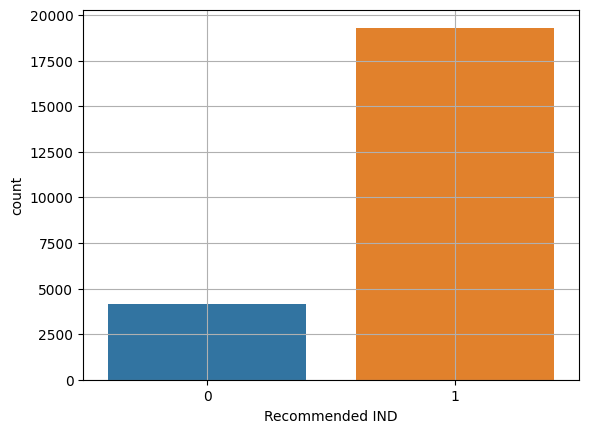

In [35]:
df1= df['Recommended IND'].value_counts().reset_index()
sns.barplot(x='Recommended IND', y='count', data=df1)
plt.grid()

We can see the Uneven Distribution of Recommended IND in the dataset. Most of the Reviews on Clothing Products have been Recommended by the Reviewers/Customers.

### Distribution of Positive Feedback Count for the reviews?

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
  Text(37, 0, '37

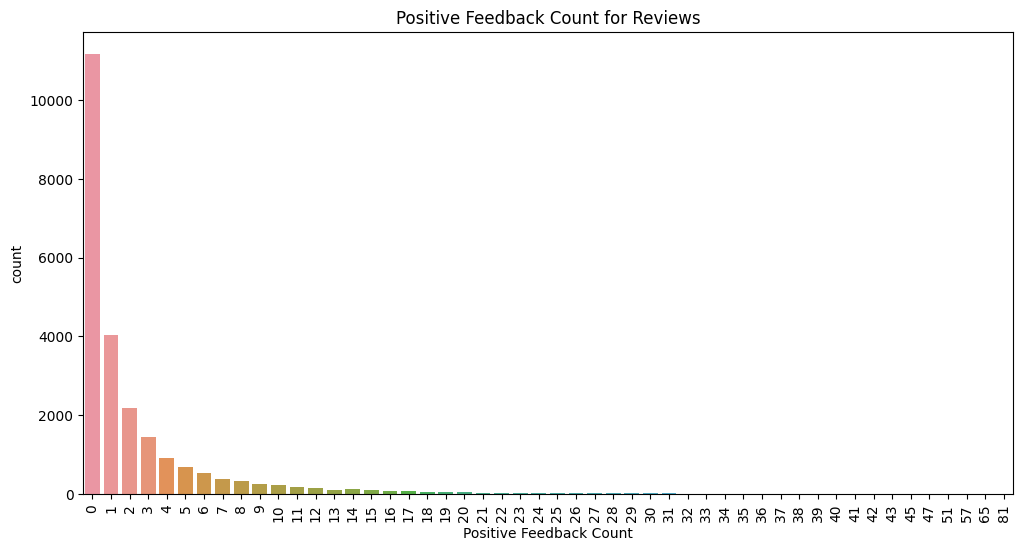

In [36]:
plt.figure(figsize=(12,6))
df1=df['Positive Feedback Count'].value_counts().reset_index()[:50]
labels= list(df1.index)
df1=df1.sort_values(by='Positive Feedback Count')
# plt.pie(df1, labels=labels,textprops={'fontsize': 15})
sns.barplot(x='Positive Feedback Count',y='count',data=df1)
plt.title('Positive Feedback Count for Reviews')
plt.xticks(rotation=90)

We can see the Positive Feedback Count is low for most of the reviews.

### What is the Rating for the Reviews with Review Text 'Not Given'??

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na 

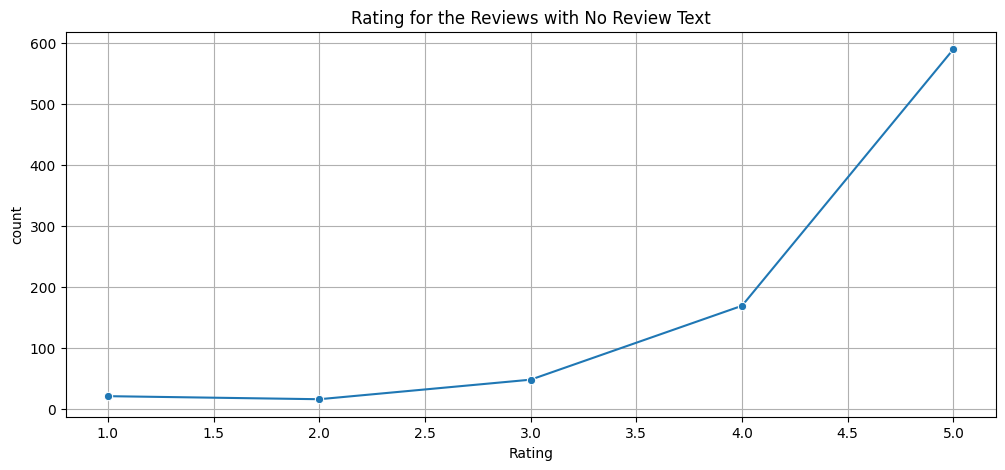

In [37]:
plt.figure(figsize=(12,5))
df2=df[df['Title']=='Not Given']['Rating'].value_counts().reset_index()
sns.lineplot(x='Rating', y='count', data=df2, marker='o')
plt.title('Rating for the Reviews with No Review Text')
plt.grid()

Here, for those Reviews where No Review was written and we had replace the Null values with the Not Given, we can see most of those
reviews have been rated more by the customers.

### Corelation between Numerical Features?

<Axes: >

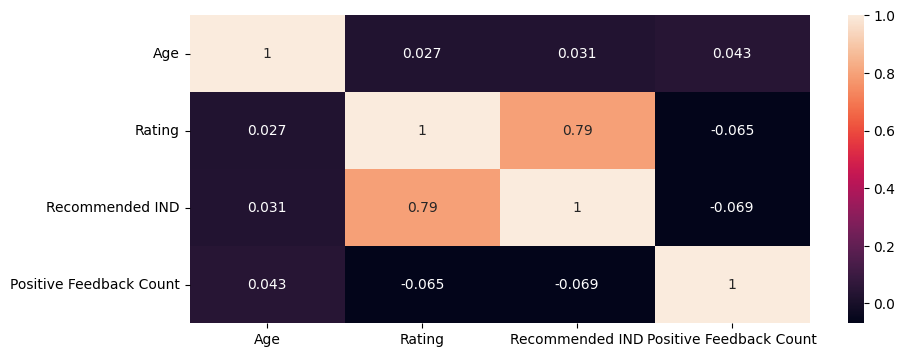

In [38]:
df1= df[['Age','Rating','Recommended IND','Positive Feedback Count' ]].corr()
plt.figure(figsize=(10,4))
sns.heatmap(df1, annot=True)

- Rating have +ive corelation with Recommended IND and quite a -ive relation with Positive Feedback Count.
- And so Positive Feedback Count and Recommended IND are -ively corelated.

- It is fascinating to know while the Reviews with High Rating are Recommended more, the People finding those Review Positively Helpful is less.

### Distribution of Class Name with other Numerical Features??

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5172\3334717233.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(list(df['Class Name'].unique()), rotation=90)


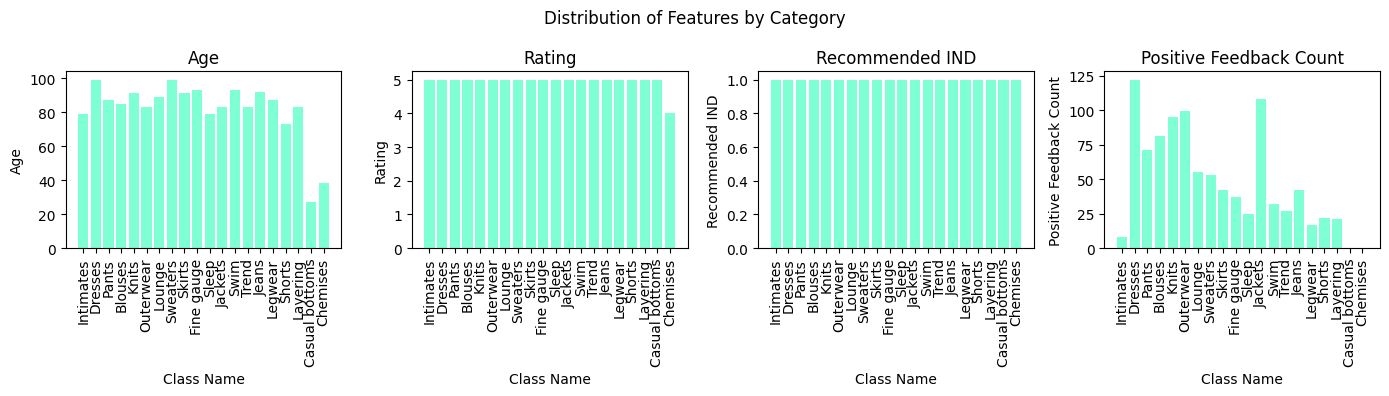

In [39]:
# Create the subplots
fig, axes = plt.subplots(1, 4, figsize=(14, 4))  # 3 rows, 1 column

# Numerical features
features = ['Age', 'Rating', 'Recommended IND','Positive Feedback Count']

# Loop through features and create subplots
for i, feature in enumerate(features):
  # Access data for each feature
  feature_data = df[feature]
  category_data = df['Class Name']

  # Plot for each feature
  axes[i].bar(category_data, feature_data,color='aquamarine')
  axes[i].set_title(feature)
  axes[i].set_xlabel("Class Name")
  axes[i].set_xticklabels(list(df['Class Name'].unique()), rotation=90)
  axes[i].set_ylabel(feature)

# Adjust layout
fig.suptitle("Distribution of Features by Category")
plt.tight_layout()
plt.show()

- We can see the Average Ratings are mostly +ive for Every Class Name Products with Casual Bottoms having highes rating and Chemises having least rating. The Age Group giving the Reviews for Casual Bottoms is also less. 
- The Age groups giving reviews for all Class Names are on average above 60 except Casual Bottoms and Chemises. So Casual Bottoms and Chemises have been reviewed and bought mainly by young customers.
- There is no particular difference in Recommendation of Products for different Class Names.
-For +ive feedback count we can see the difference. Class Name like dresses and Jackets have high +ive feedback count while Casual Bottoms , Chemises and Intimates Class Names have very low +ive feedback count.

In [40]:
df.groupby(['Age Group'])['Rating'].mean()

Age Group
11-20    4.322368
21-30    4.185616
31-40    4.166203
41-50    4.166017
51-60    4.245758
61-70    4.291201
71-80    4.199288
81-90    4.558140
90+      3.769231
Name: Rating, dtype: float64

### . What is the Rating for Different Age Groups?


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is 

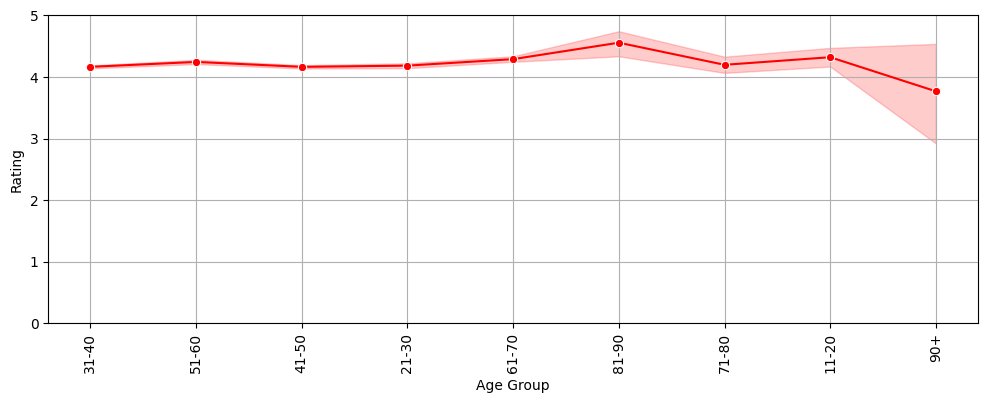

In [41]:
plt.figure(figsize=(12,4))
# df['Age Group']=df['Age Group'].sort_values()
# plt.figure(figsize=(14,4))
sns.lineplot(x='Age Group', data=df, y='Rating', color='red', marker='o')
plt.xticks(rotation = 90)
plt.ylim(0,5)
plt.grid()

- The Rating are also +ive for all the Age Groups. The Age Group giving the highest Rating falls under 81-90 Ages Customers followed by 11-20 and 61-70 Age Group Customers.
- The least Rating is given by 90+ customers. But Customers giving reviews over 90 are also less. So this can be the reason for this distribution.

In [42]:
# df.groupby(['Class Name'])['Age'].mean().reset_index()

### Distribution of Class Name Categories on basis of Rating, Age Group Wise?

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5172\1313880677.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Class Name', y='Rating', data=df, hue='Age Group',ci=None)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Intimates'),
  Text(1, 0, 'Dresses'),
  Text(2, 0, 'Pants'),
  Text(3, 0, 'Blouses'),
  Text(4, 0, 'Knits'),
  Text(5, 0, 'Outerwear'),
  Text(6, 0, 'Lounge'),
  Text(7, 0, 'Sweaters'),
  Text(8, 0, 'Skirts'),
  Text(9, 0, 'Fine gauge'),
  Text(10, 0, 'Sleep'),
  Text(11, 0, 'Jackets'),
  Text(12, 0, 'Swim'),
  Text(13, 0, 'Trend'),
  Text(14, 0, 'Jeans'),
  Text(15, 0, 'Legwear'),
  Text(16, 0, 'Shorts'),
  Text(17, 0, 'Layering'),
  Text(18, 0, 'Casual bottoms'),
  Text(19, 0, 'Chemises')])

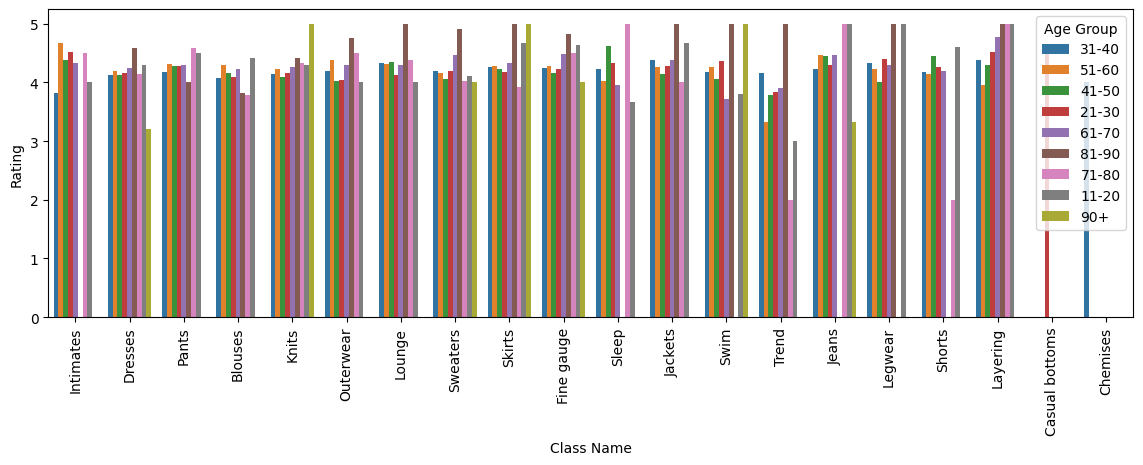

In [43]:
plt.figure(figsize=(14,4))
sns.barplot(x='Class Name', y='Rating', data=df, hue='Age Group',ci=None)
plt.xticks(rotation=90)

There is not much difference in distribution of Class Name Ratings on Age group Wise. But for major Class Names Categories Customers of age 81-90 have gave higher ratings followed by 11-20 Age group Customers.
- For Trends and Shorts Class Names 71-80 Age Group Customers have gave low ratings.
- For Dresses 90+ Age Groups Customers have gave quite low ratings.

## Feature Engineering

In [44]:
unique_func(df)

,column_name,no_unique,duplicate,null values,dtypes
0,Clothing ID,1199,22273,0,int64
1,Age,77,23395,0,int64
2,Title,13985,9487,0,object
3,Review Text,22622,850,0,object
4,Rating,5,23467,0,int64
5,Recommended IND,2,23470,0,int64
6,Positive Feedback Count,82,23390,0,int64
7,Division Name,3,23469,0,object
8,Department Name,6,23466,0,object
9,Class Name,20,23452,0,object


We have already worked on Missing Values from the above features. Let's Get into Encoding Now.

### Division Name

In [45]:

dictt=df['Division Name'].value_counts().to_dict()
dictt

{'General': 13850, 'General Petite': 8120, 'Initmates': 1502}

There are just 3 unique values in this feature. Replacing the values with Frequency/Count Encoding.

In [46]:
df['Division Name']=df['Division Name'].map(dictt)

In [47]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Titlenan_var,Review Textnan_var,Age Group
0,767,33,Love it!,Absolutely wonderful - silky and sexy and comf...,4,1,0,1502,Intimate,Intimates,0,1,31-40
1,1080,34,Love it!,Love this dress! it's sooo pretty. i happene...,5,1,4,13850,Dresses,Dresses,0,1,31-40
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,13850,Dresses,Dresses,1,1,51-60
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,8120,Bottoms,Pants,1,1,41-50
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,13850,Tops,Blouses,1,1,41-50


### Department Name

<Axes: xlabel='Department Name'>

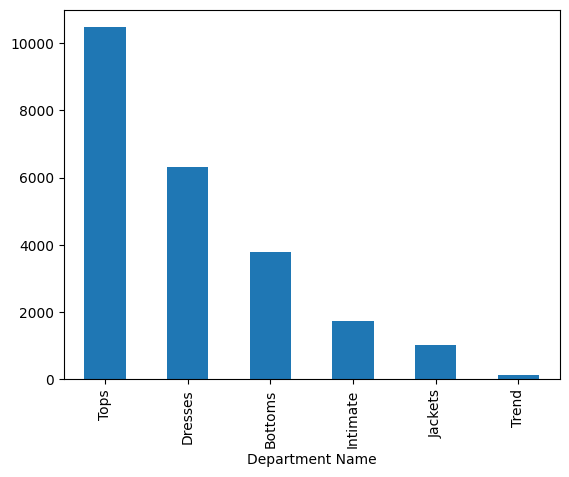

In [48]:
df['Department Name'].value_counts().plot.bar()

We can also do One Hot Encoding for Department Name since there are only 6 unique values.

In [49]:
dictt=df['Department Name'].value_counts().to_dict()
dictt

{'Tops': 10468,
 'Dresses': 6319,
 'Bottoms': 3799,
 'Intimate': 1735,
 'Jackets': 1032,
 'Trend': 119}

In [50]:
df['Department Name']=df['Department Name'].map(dictt)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Titlenan_var,Review Textnan_var,Age Group
0,767,33,Love it!,Absolutely wonderful - silky and sexy and comf...,4,1,0,1502,1735,Intimates,0,1,31-40
1,1080,34,Love it!,Love this dress! it's sooo pretty. i happene...,5,1,4,13850,6319,Dresses,0,1,31-40
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,13850,6319,Dresses,1,1,51-60
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,8120,3799,Pants,1,1,41-50
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,13850,10468,Blouses,1,1,41-50


### Class Name

In [51]:
df['Class Name'].value_counts()

Class Name
Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: count, dtype: int64

There are several categories. Let's try Frequency/Count Encoding on this feature.

In [52]:
dict= df['Class Name'].value_counts().to_dict()
dict

{'Dresses': 6319,
 'Knits': 4843,
 'Blouses': 3097,
 'Sweaters': 1428,
 'Pants': 1388,
 'Jeans': 1147,
 'Fine gauge': 1100,
 'Skirts': 945,
 'Jackets': 704,
 'Lounge': 691,
 'Swim': 350,
 'Outerwear': 328,
 'Shorts': 317,
 'Sleep': 228,
 'Legwear': 165,
 'Intimates': 154,
 'Layering': 146,
 'Trend': 119,
 'Casual bottoms': 2,
 'Chemises': 1}

In [53]:
df['Class Name']= df['Class Name'].map(dict)
df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Titlenan_var,Review Textnan_var,Age Group
0,767,33,Love it!,Absolutely wonderful - silky and sexy and comf...,4,1,0,1502,1735,154,0,1,31-40
1,1080,34,Love it!,Love this dress! it's sooo pretty. i happene...,5,1,4,13850,6319,6319,0,1,31-40
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,13850,6319,6319,1,1,51-60
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,8120,3799,1388,1,1,41-50
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,13850,10468,3097,1,1,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,8120,6319,6319,1,1,31-40
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,8120,10468,4843,1,1,41-50
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,8120,6319,6319,1,1,31-40
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,13850,6319,6319,1,1,21-30


### Title

In [54]:
df['Title'].nunique()
# df['Review Text'].nunique()

13985

Let's Apply Hashing Encoding on the Title Feature since we have a lot of categories here.

In [55]:
def hash_string(string):
  """Hashes a string into an integer."""
  hash_value = 0
  for char in string:
    hash_value += ord(char)
  return hash_value % 10000

In [56]:
strings= list(df['Title'].unique())
hashed_strings= [hash_string(string) for string in strings]

In [57]:
x=zip(strings, hashed_strings)

In [58]:
dictt= {key:value for key, value in zip(strings, hashed_strings)}
# dictt

In [59]:
df['Title']=df['Title'].map(dictt)
df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Titlenan_var,Review Textnan_var,Age Group
0,767,33,692,Absolutely wonderful - silky and sexy and comf...,4,1,0,1502,1735,154,0,1,31-40
1,1080,34,692,Love this dress! it's sooo pretty. i happene...,5,1,4,13850,6319,6319,0,1,31-40
2,1077,60,2212,I had such high hopes for this dress and reall...,3,0,0,13850,6319,6319,1,1,51-60
3,1049,50,1495,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,8120,3799,1388,1,1,41-50
4,847,47,1626,This shirt is very flattering to all due to th...,5,1,6,13850,10468,3097,1,1,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,2898,I was very happy to snag this dress at such a ...,5,1,0,8120,6319,6319,1,1,31-40
23482,862,48,2406,"It reminds me of maternity clothes. soft, stre...",3,1,0,8120,10468,4843,1,1,41-50
23483,1104,31,1958,"This fit well, but the top was very see throug...",3,0,1,8120,6319,6319,1,1,31-40
23484,1084,28,4724,I bought this dress for a wedding i have this ...,3,1,2,13850,6319,6319,1,1,21-30


In [60]:
df['Title'].nunique()

3629

### Feature Selection

I will be dropping Review Text Column. I believe title feature already gives us the idea about a Customers Sentiments for a particular review. So Instead of having this whole feature with categories like Paragraph, we can drop this column.

In [61]:
df=df.drop(['Review Text','Review Textnan_var'], axis=1)

Let's drop Age Group feature since we already have Age feature.

In [62]:
df=df.drop(['Age Group'], axis=1)

In [63]:
df

,Clothing ID,Age,Title,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Titlenan_var
0,767,33,692,4,1,0,1502,1735,154,0
1,1080,34,692,5,1,4,13850,6319,6319,0
2,1077,60,2212,3,0,0,13850,6319,6319,1
3,1049,50,1495,5,1,0,8120,3799,1388,1
4,847,47,1626,5,1,6,13850,10468,3097,1
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,2898,5,1,0,8120,6319,6319,1
23482,862,48,2406,3,1,0,8120,10468,4843,1
23483,1104,31,1958,3,0,1,8120,6319,6319,1
23484,1084,28,4724,3,1,2,13850,6319,6319,1


In [64]:
df['Class Name'].nunique()

20

<Axes: >

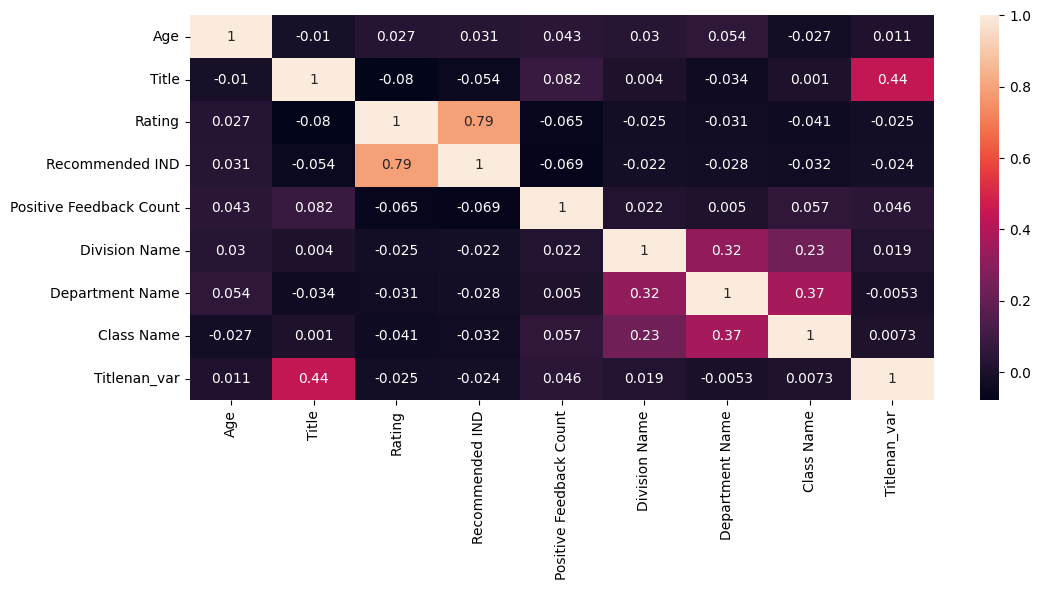

In [65]:
plt.figure(figsize=(12,5))
sns.heatmap(df.corr().iloc[1:,1:], annot=True)

### Feature Transformation

I am using Logarithmic/Gaussian Transformation.

In [66]:
import scipy.stats as stat
import pylab

In [67]:
def distri_func(df, x):
    plt.figure(figsize=(8,4))
    # plt.subplot(1,2,1)
    # df[x].hist()
    # plt.subplot(1,2,2)
    stat.probplot(df[x],dist='norm',plot=pylab)
    plt.title(x)
    plt.show()
    

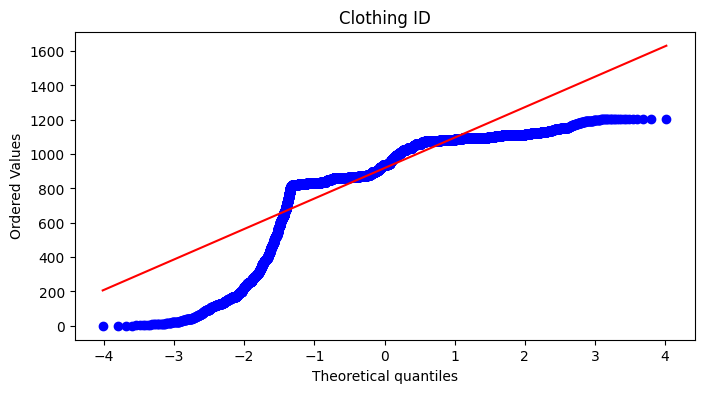

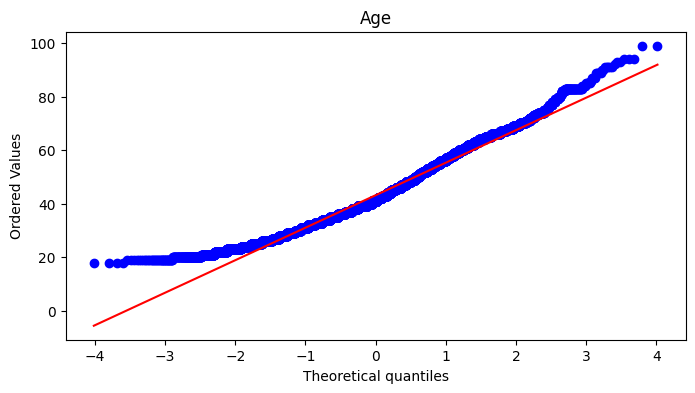

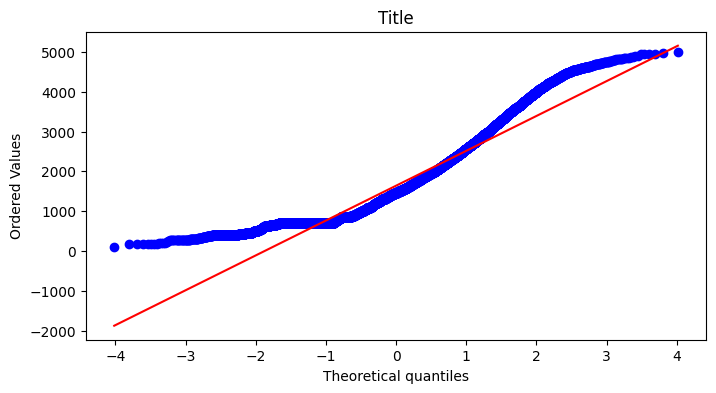

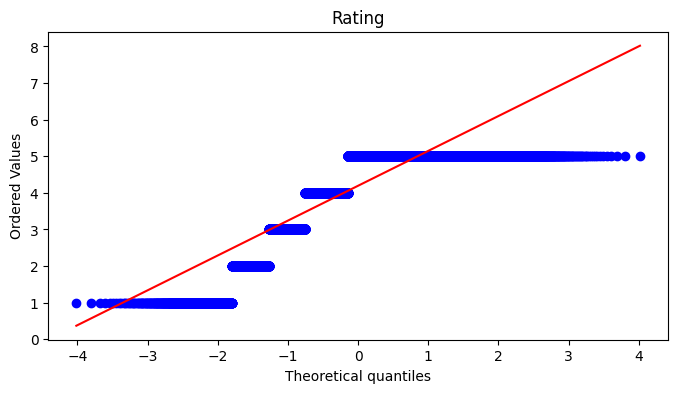

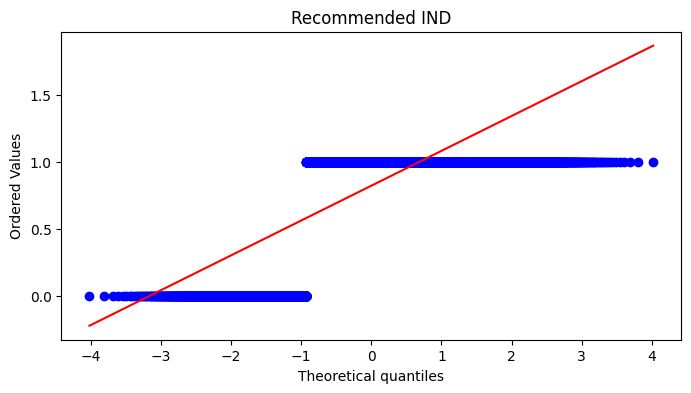

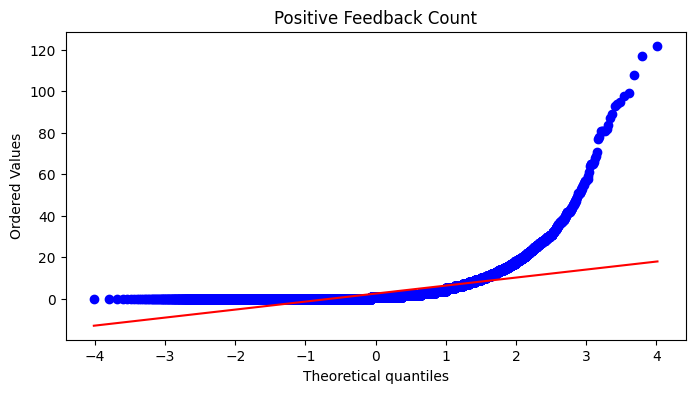

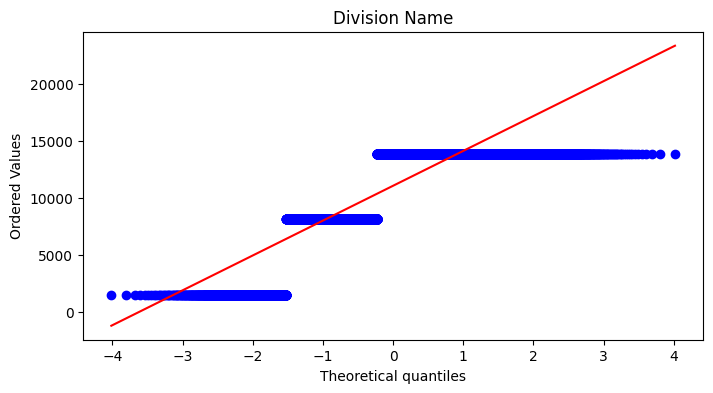

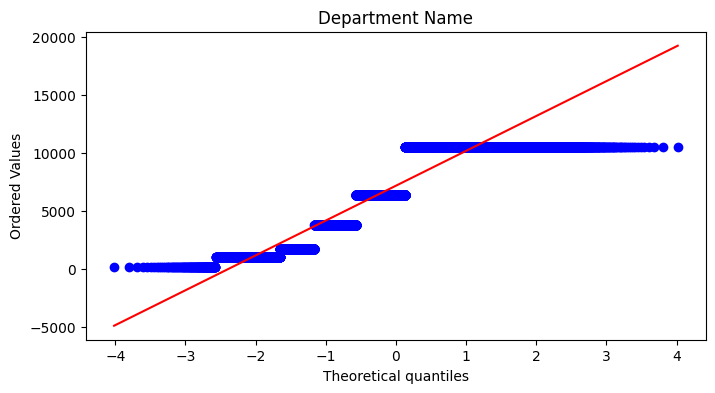

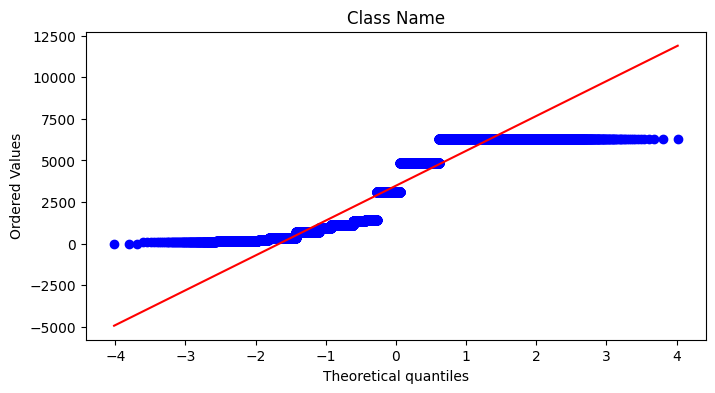

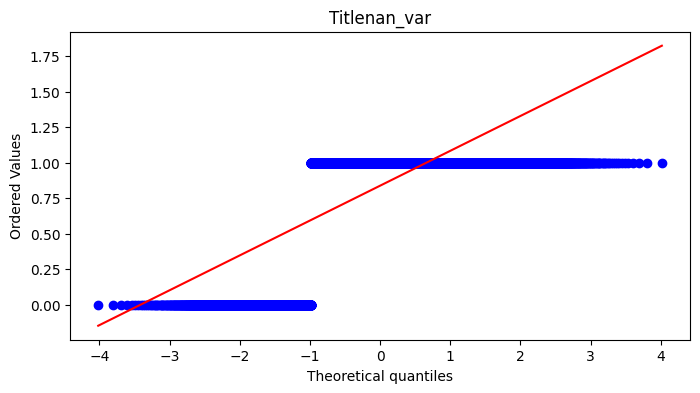

In [68]:
for i in list(df.columns):
    distri_func(df,i)


In [69]:
def col_tran(x):
    x_df=pd.DataFrame()
    x_df[x+' logff']=np.log(df[x])
    x_df[x+' sq_root']=df[x]**(1/2)
    x_df[x+' reciprocal']=1/df[x]
    x_df[x+' exponent']=df[x]**(1/1.2)
    # for i in list(x_df.columns):
    #     distri_func(x_df, i)
    # return x_df
    for i in list(x_df.columns):
        distri_func(x_df, i)

In [70]:
# df.drop( 'Clothing Id log',inplace=True, axis=1)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


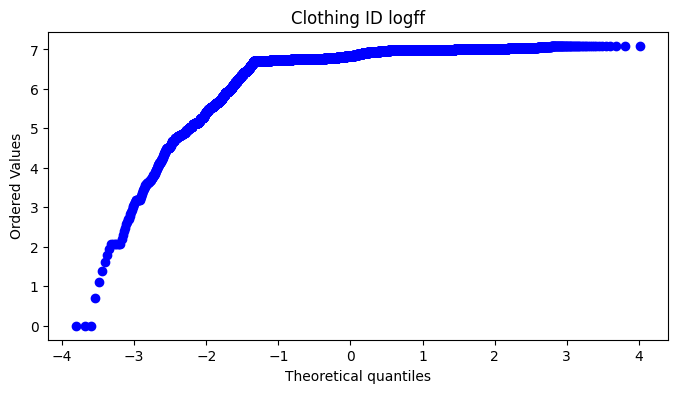

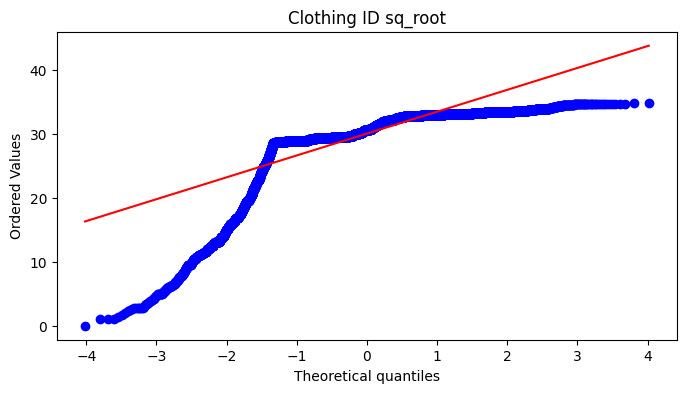

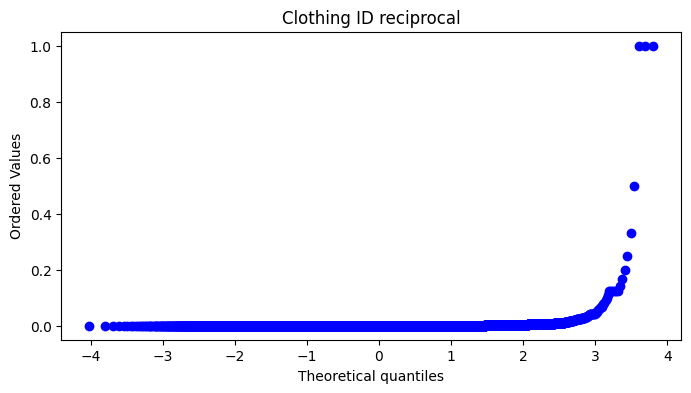

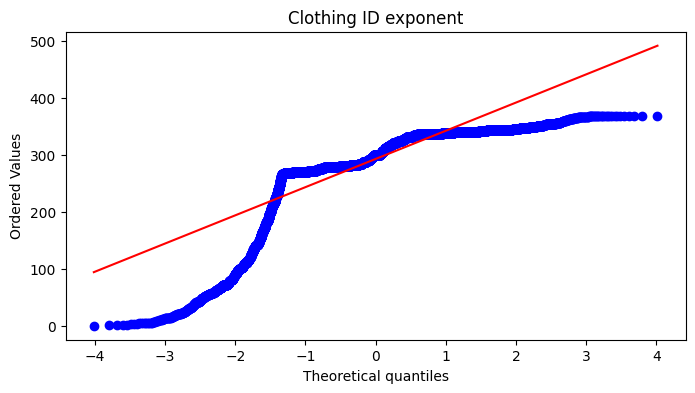

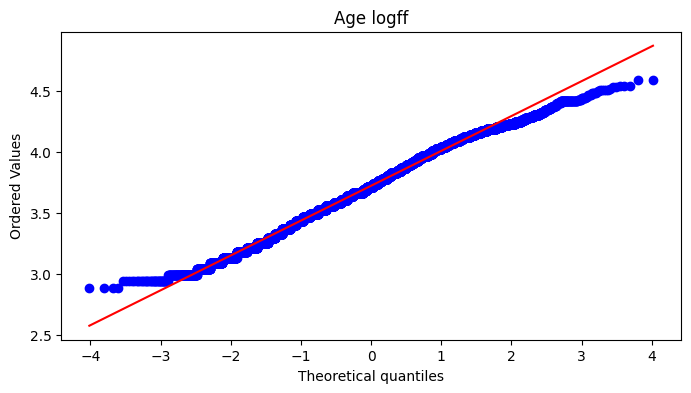

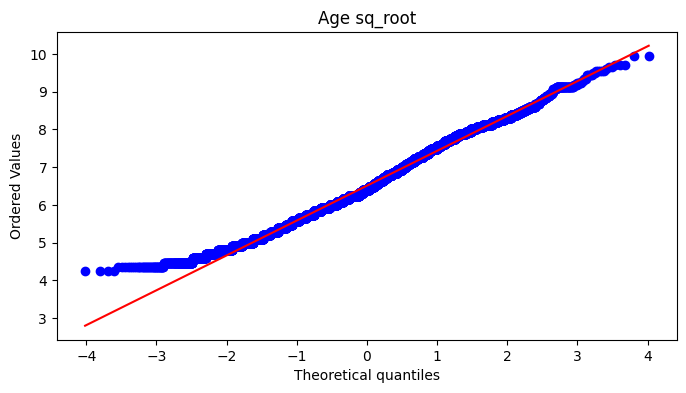

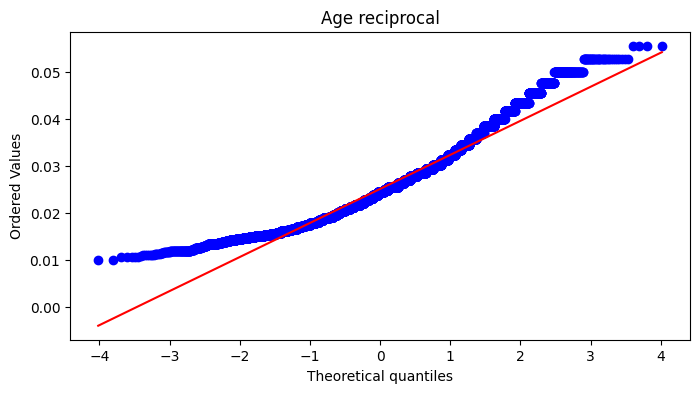

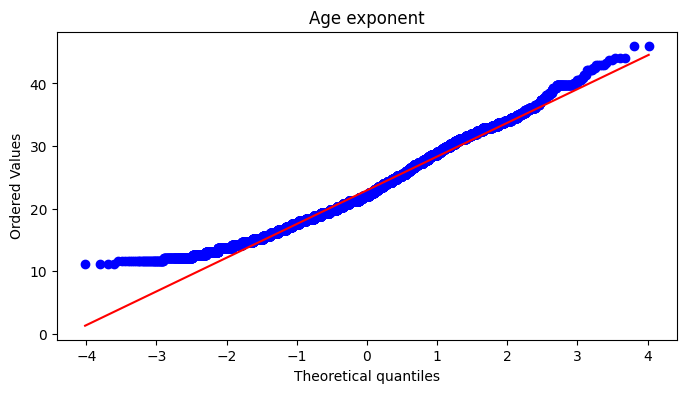

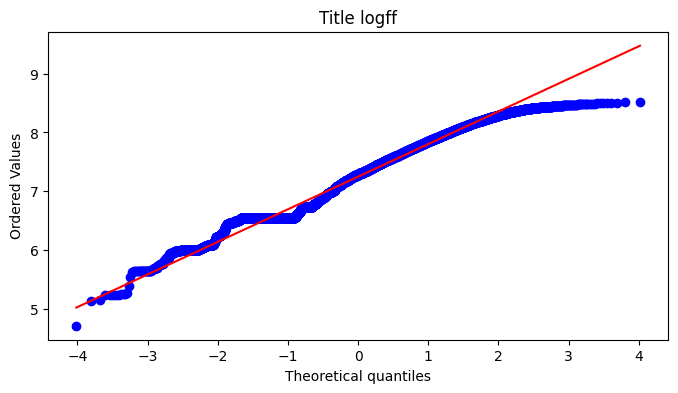

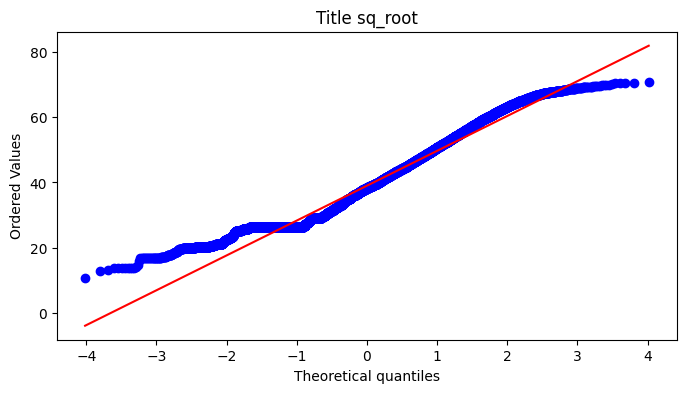

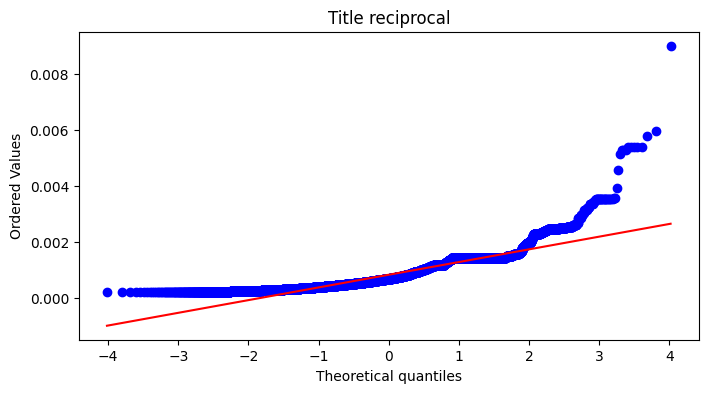

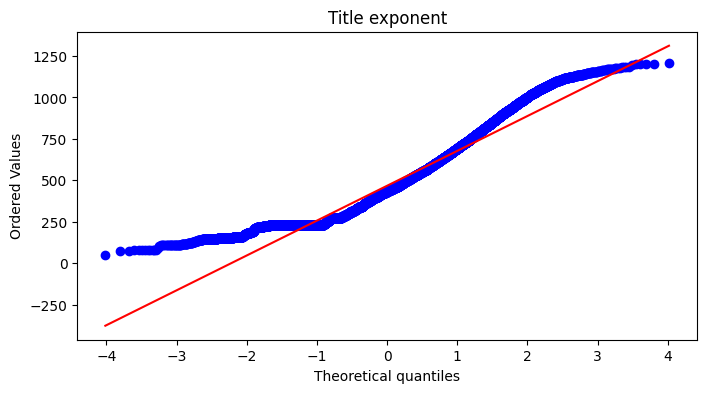

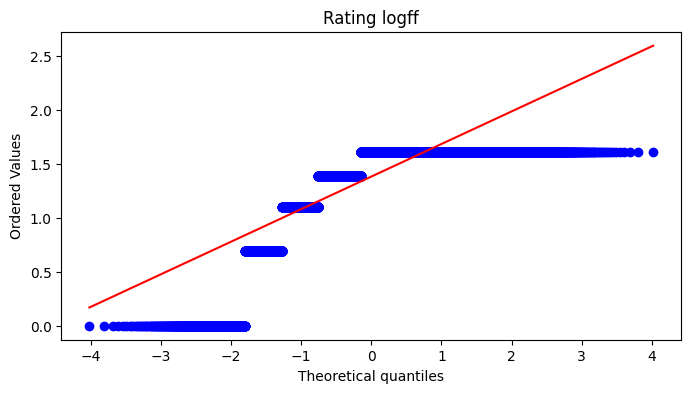

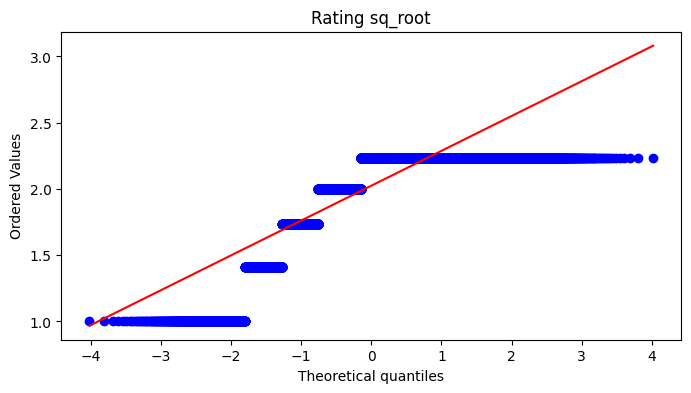

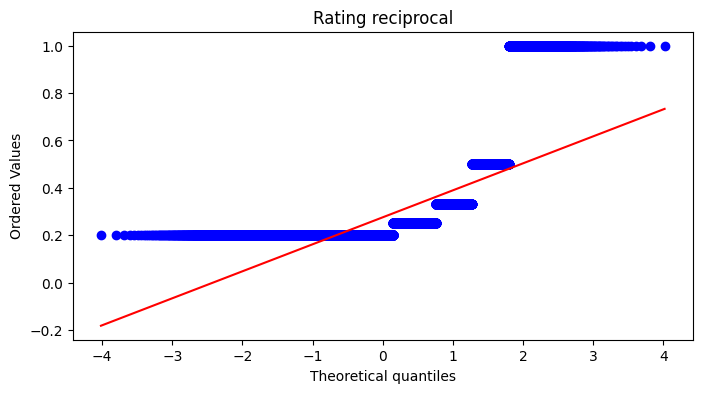

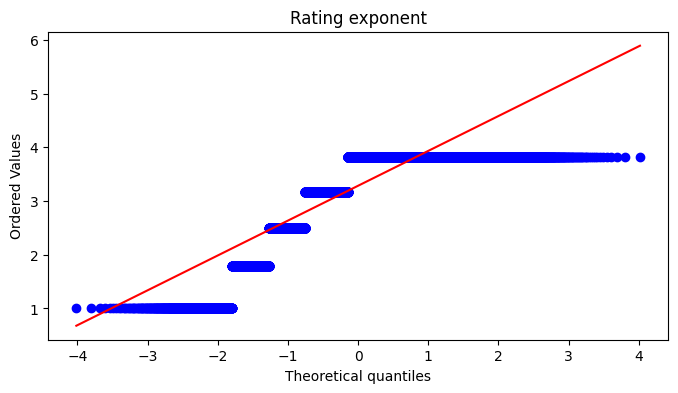

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


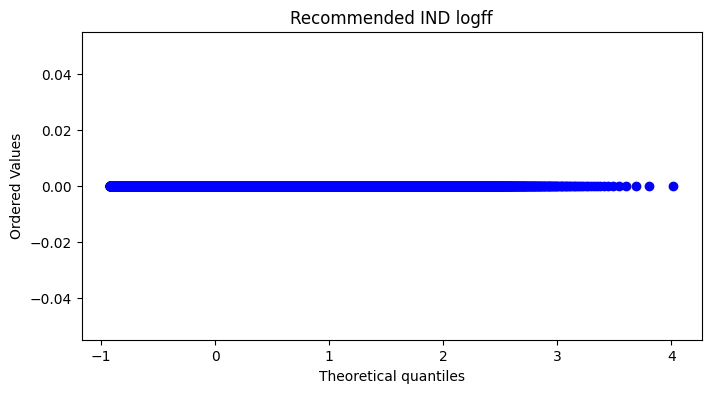

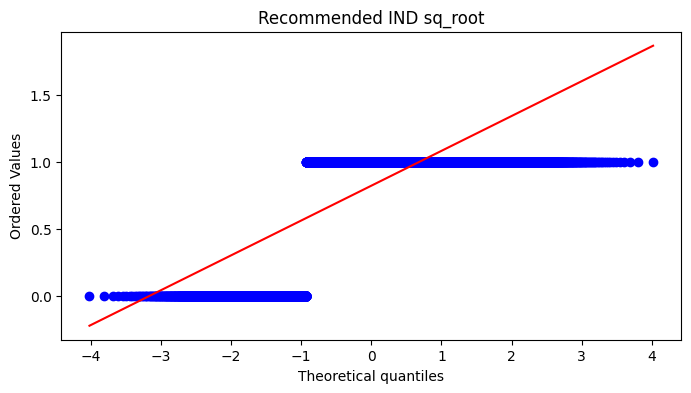

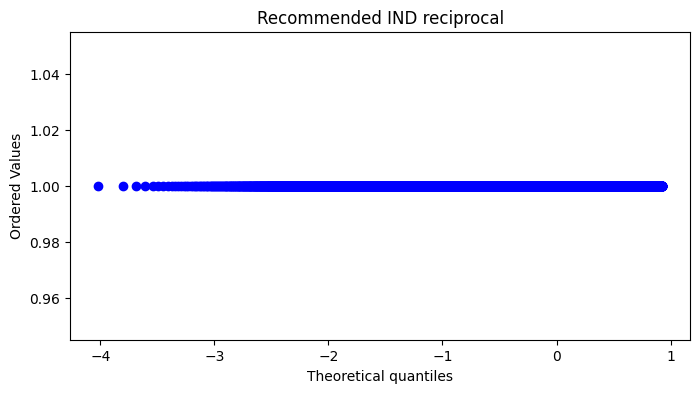

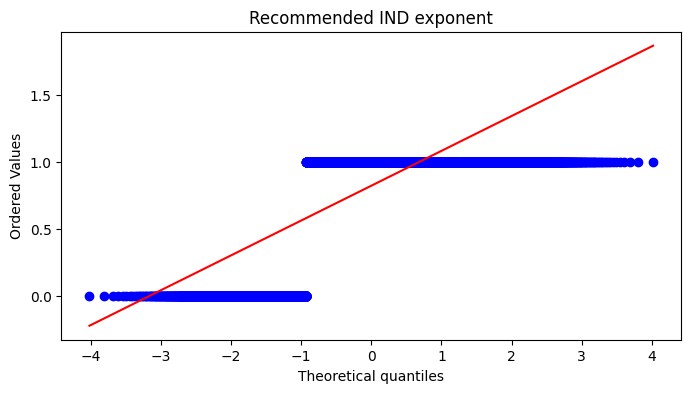

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


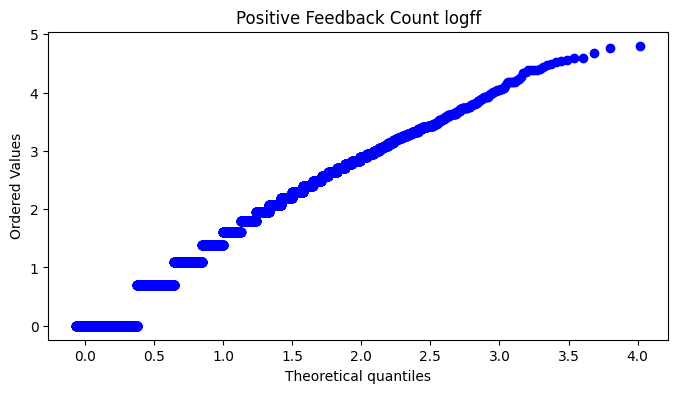

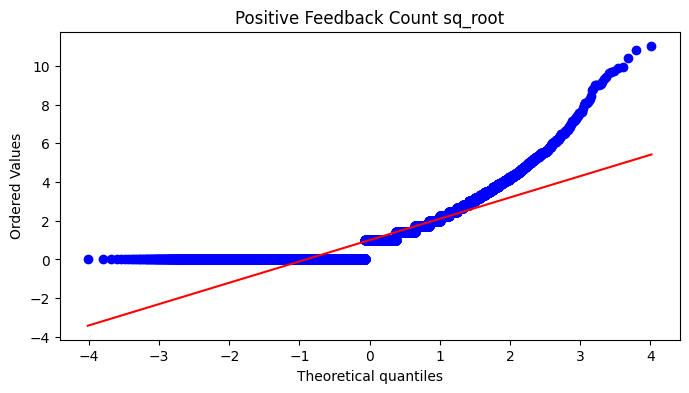

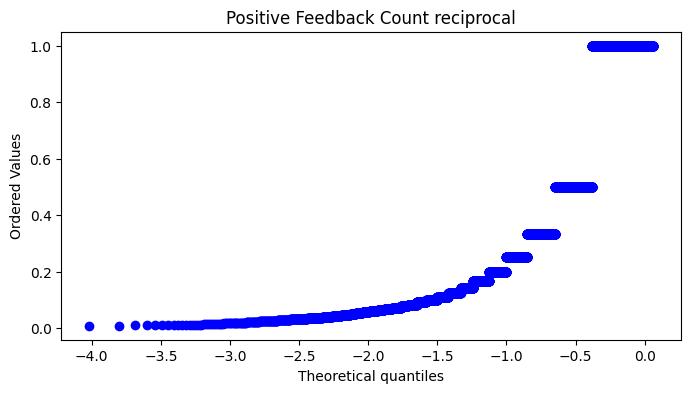

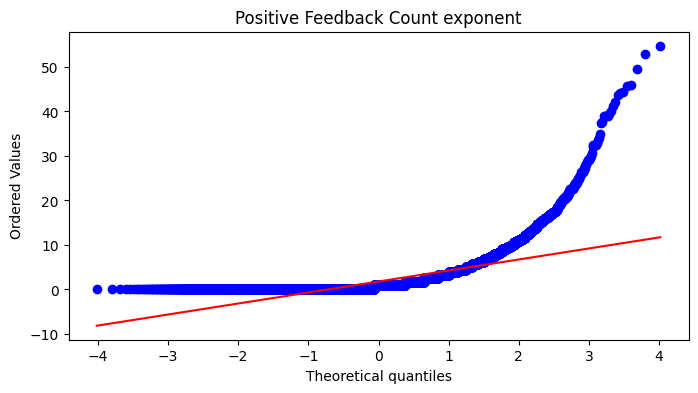

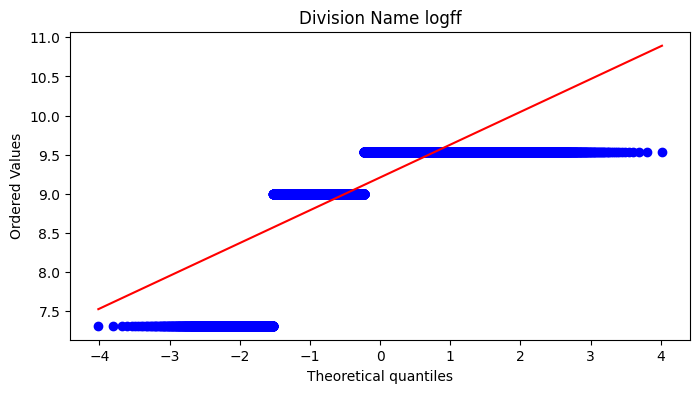

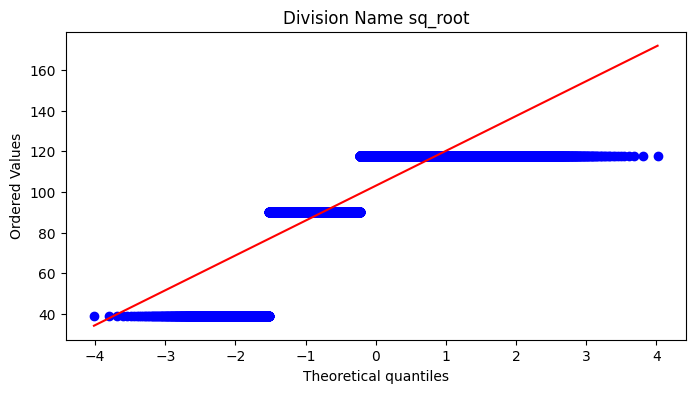

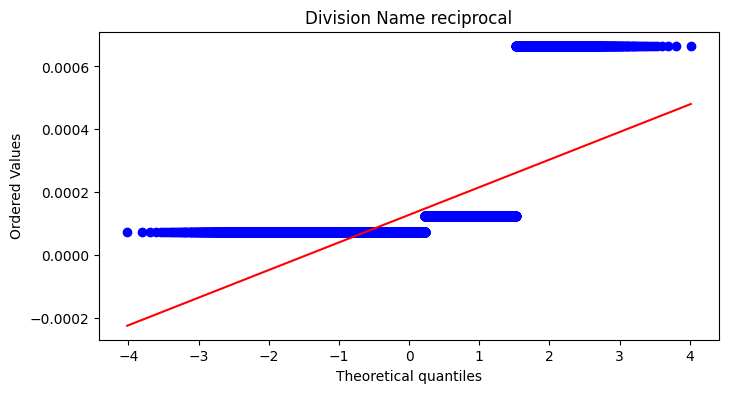

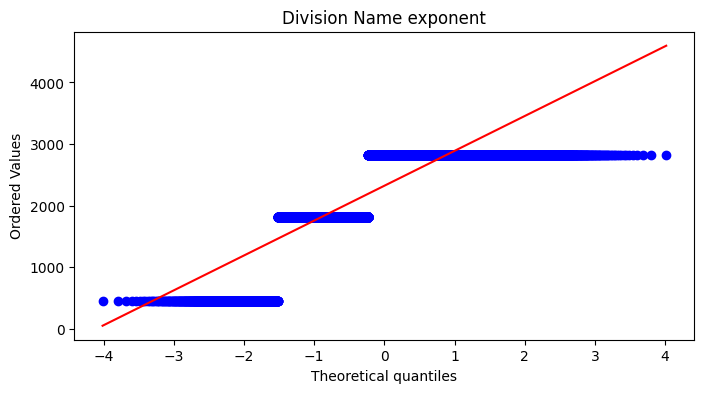

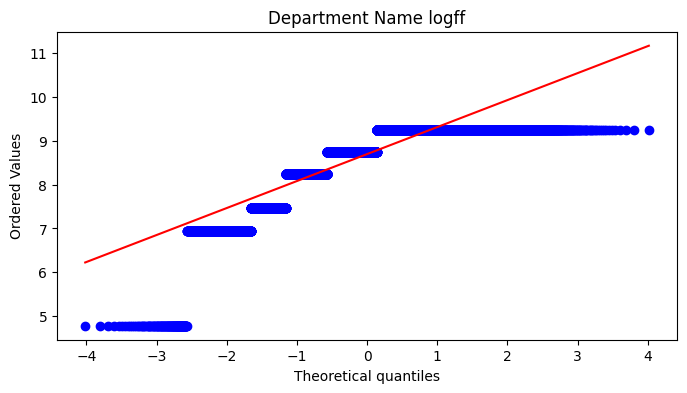

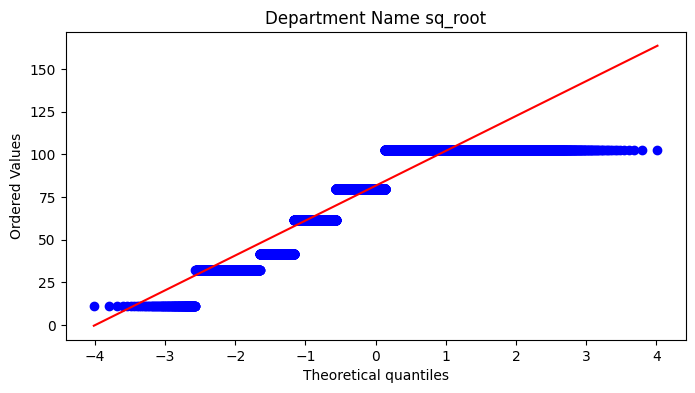

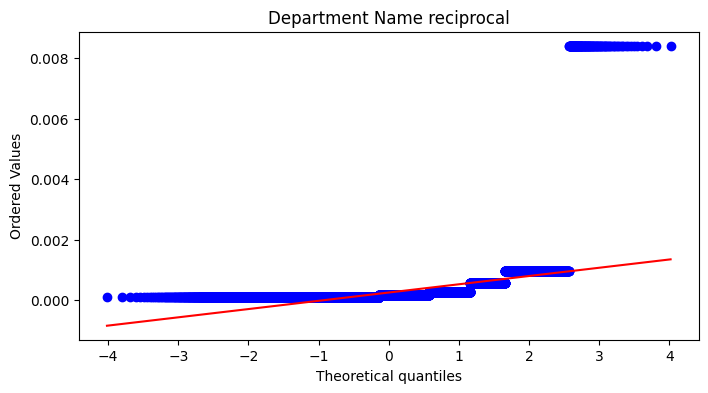

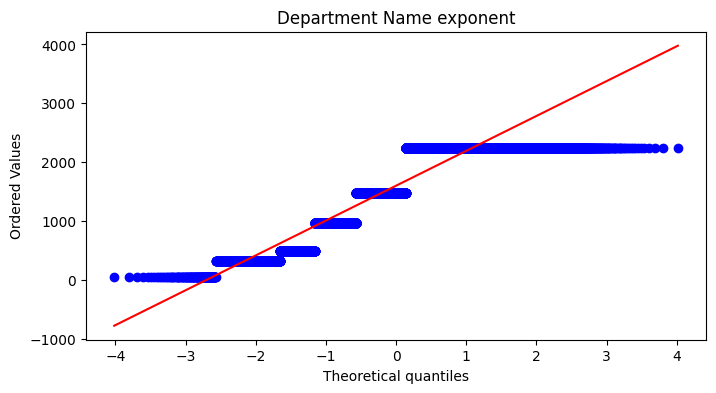

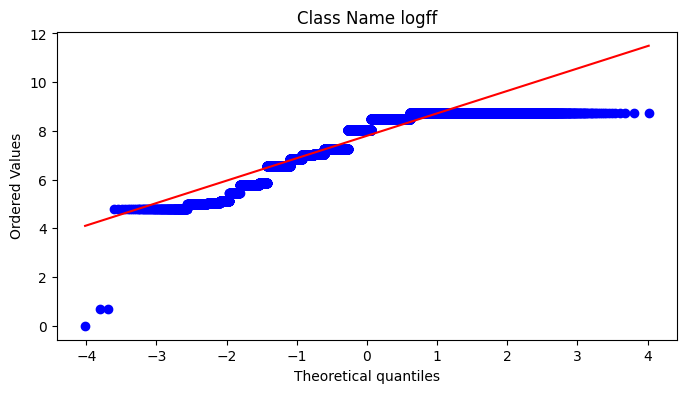

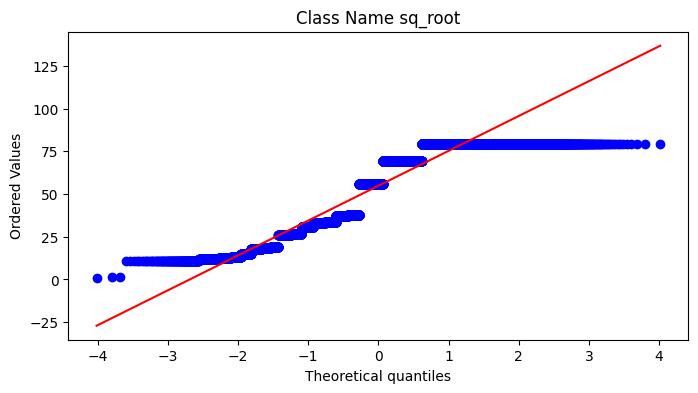

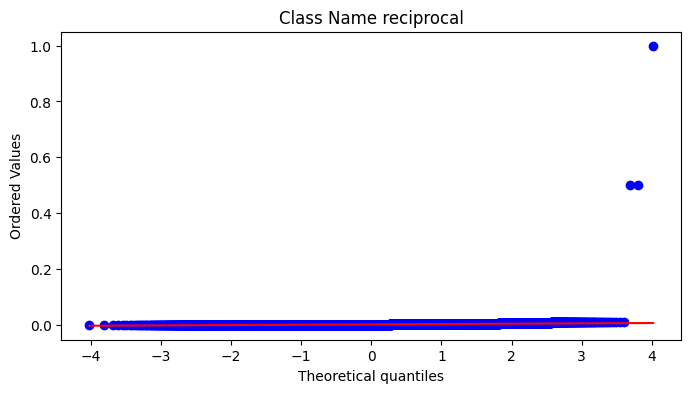

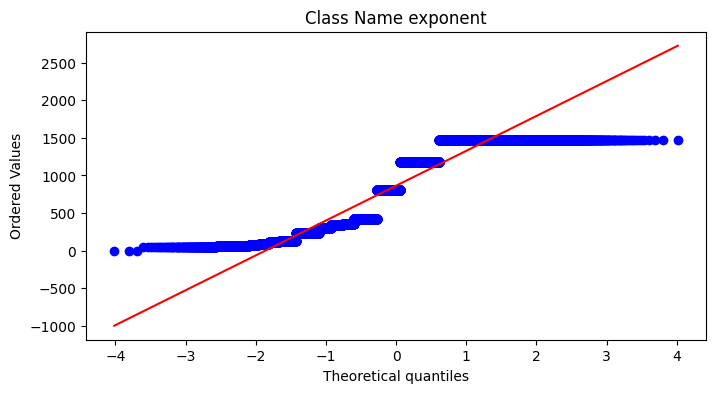

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


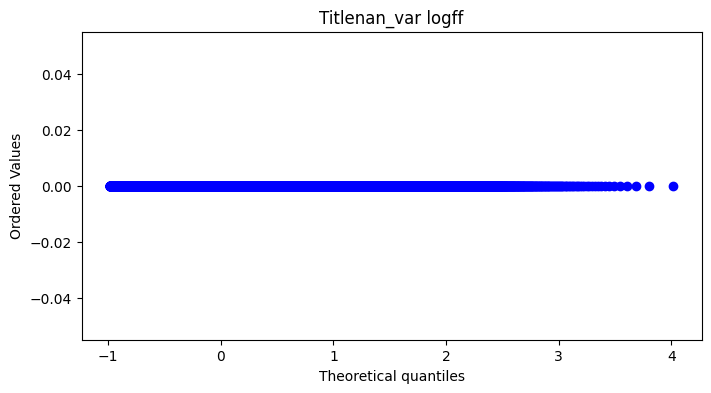

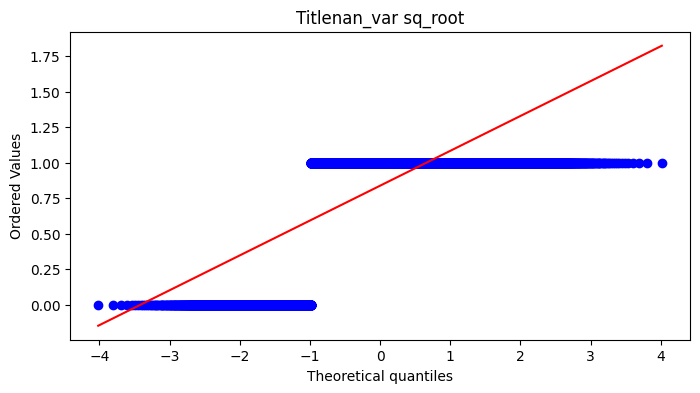

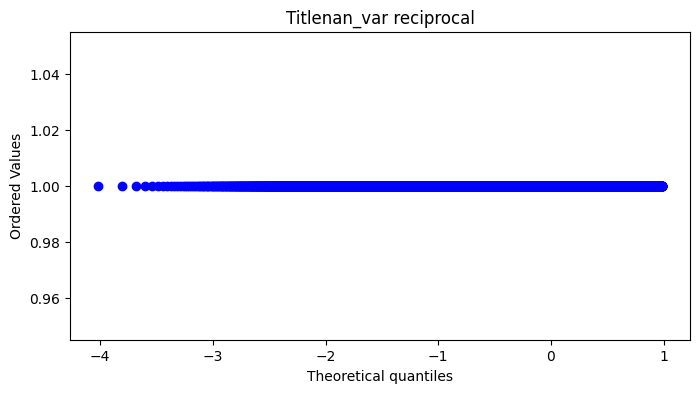

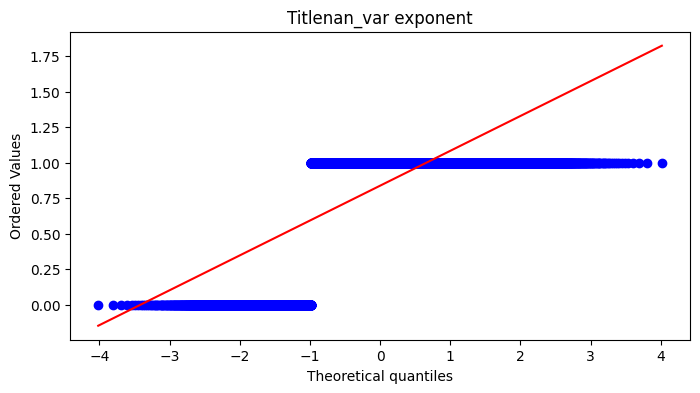

In [71]:
for i in list(df.columns):
    col_tran(i)

- Gaussian Transformation techniques are not giving kind of normally distribution for all the features.
- Let's apply Min-Max Scaling for feature Transformation.

In [72]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()

df_min_max=pd.DataFrame(min_max.fit_transform(df), columns=df.columns)
df_min_max.head()

,Clothing ID,Age,Title,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Titlenan_var
0,0.636515,0.185185,0.118936,0.75,1.0,0.000000,0.000000,0.156150,0.024217,0.0
1,0.896266,0.197531,0.118936,1.00,1.0,0.032787,1.000000,0.599092,1.000000,0.0
2,0.893776,0.518519,0.430092,0.50,0.0,0.000000,1.000000,0.599092,1.000000,1.0
3,0.870539,0.395062,0.283316,1.00,1.0,0.000000,0.535957,0.355590,0.219531,1.0
4,0.702905,0.358025,0.310133,1.00,1.0,0.049180,1.000000,1.000000,0.490028,1.0


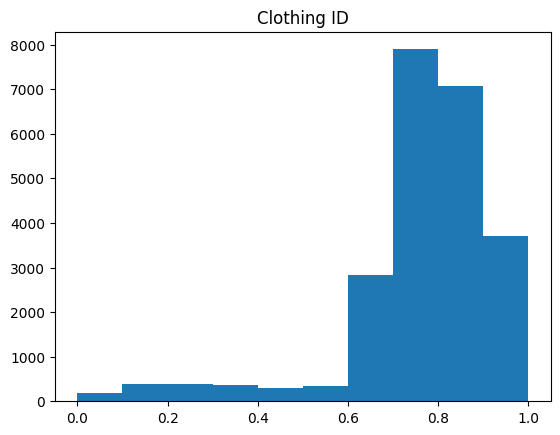

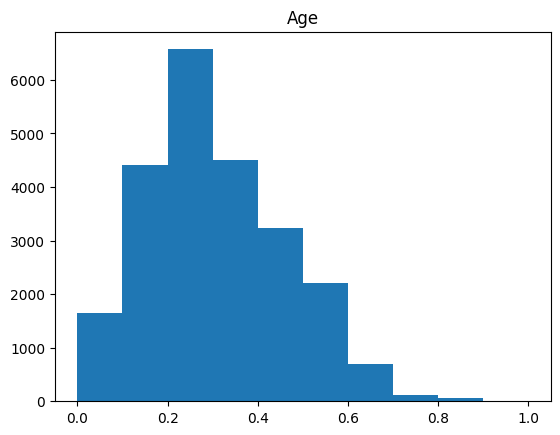

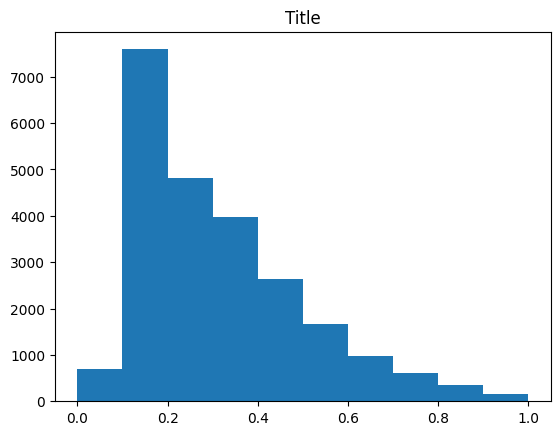

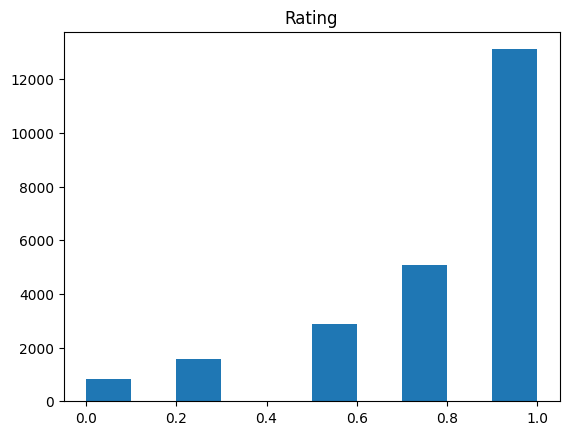

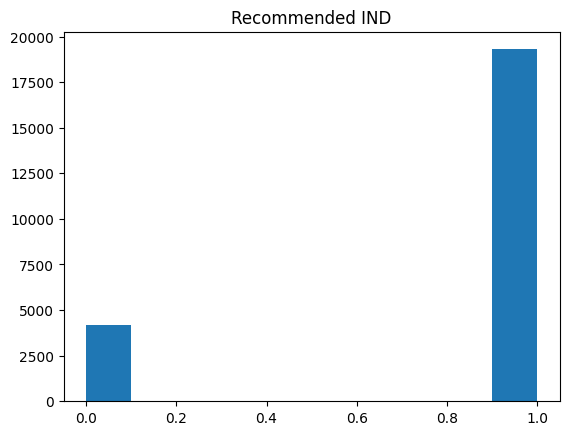

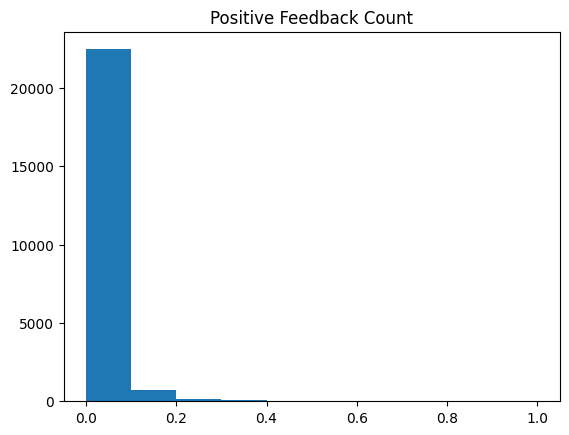

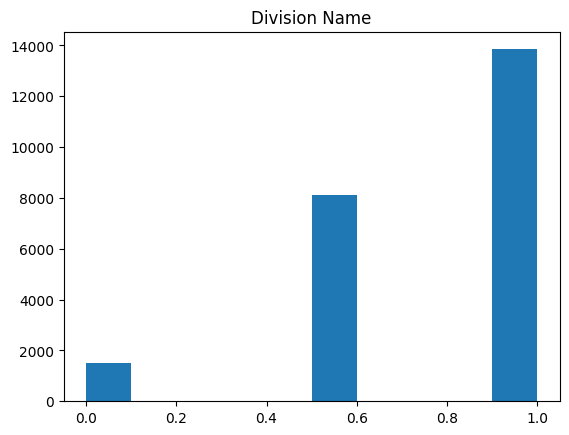

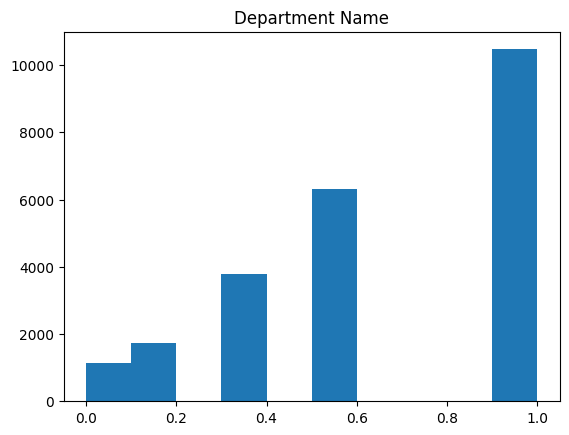

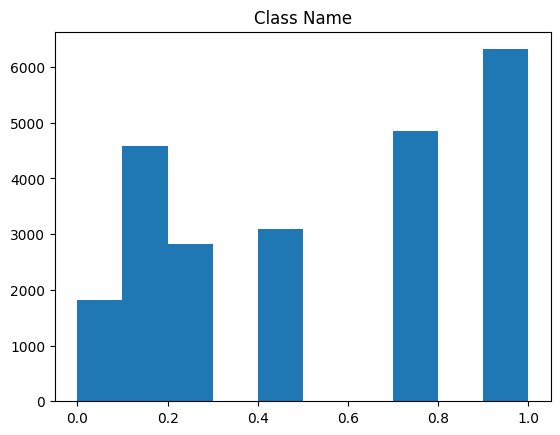

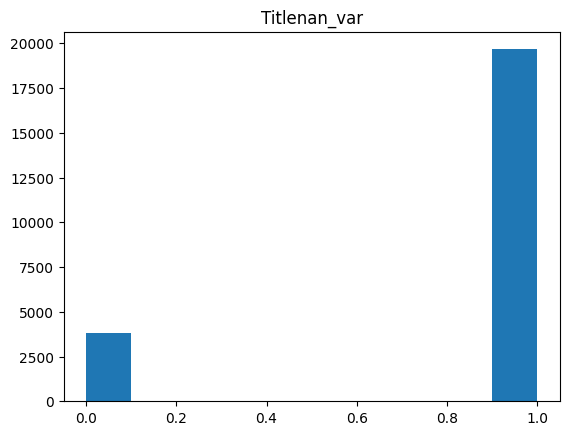

In [73]:
for i in list(df_min_max.columns):
        plt.hist(df_min_max[i])
        plt.title(i)
        plt.show()

**Finally we have our final Data Frame df_min_max which contains all the features in Numerical Format which have categories ranging between 0 and 1.**
- This Whole Feature Engineering for this Dataset is done without considering the Machine Learning Models.
- **!!!! Just Tried to Implement feature engineering concepts, learned so far!!!!** 